<a href="https://colab.research.google.com/github/alriyadsouza/MediScanPro/blob/main/MediScan_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Keras-OCR- left to right, top to bottom

In [ ]:
!pip install keras-ocr
!pip install matplotlib
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
import math, keras_ocr

In [ ]:
image_path = 'imguse.jpg'

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Plot...
original_image = cv2.imread(image_path)
original_image = original_image[:, :, ::-1]
plt.imshow(original_image)

In [ ]:
# Initialize pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Read in image
read_image = keras_ocr.tools.read(image_path)

# prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([read_image])

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
5/5 [==============================] - 43s 8s/step


<Axes: >

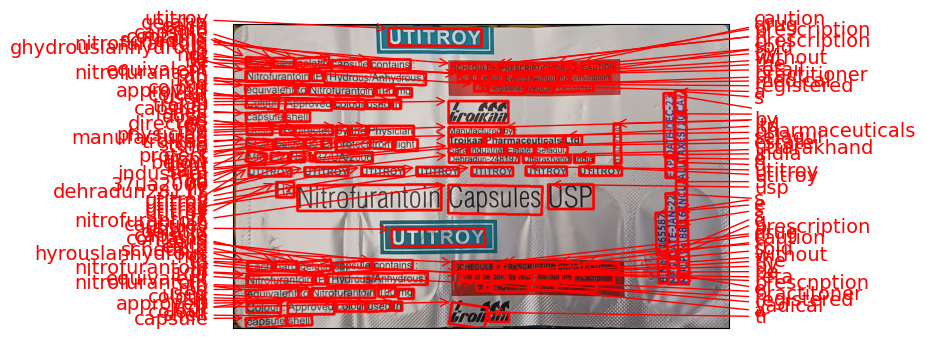

In [ ]:
keras_ocr.tools.drawAnnotations(image=read_image, predictions=prediction_groups[0])

In [ ]:
# (word, ( [[top-left], [top-right], [bottom-right], [bottom-left]] ))
prediction_groups[0][0]

('utitroy',
 array([[402.63452 ,  10.390385],
        [641.5772  ,  13.045301],
        [641.08026 ,  57.775887],
        [402.1375  ,  55.12097 ]], dtype=float32))

In [ ]:
raw_detections = []
for prediction in prediction_groups[0]:
    raw_detections.append(prediction[0])
print(f'Detections: {raw_detections}') # out of order

Detections: ['utitroy', 'each', 'hard', 'gelatin', 'capsule', 'contains', 'caution', 'schedule', 'drug', 'h', 'prescription', 'nitrofurantoin', 'ip', 'ghydrousianhydrous', 'prescription', 'not', 'to', 'be', 'sold', 'by', 'without', 'the', 'retail', 'of', 'registered', 'medical', 'practitioner', 'a', 'nitrofurantoin', 'equivalent', 'to', '100', 'mg', 's', '', 'colour', 'approved', 'colour', 'used', 'in', 'trokal', 'capsule', 'shell', '', '', 'dose', 'as', 'directed', 'by', 'the', 'physician', 'manufactured', 'by', 'troikaa', 'pharmaceuticals', 'ltd', 'store', '300', 'c', 'below', 'from', 'protect', 'light', 'sara', 'industrial', 'estate', 'selaqui', 'mfg', 'no', '37ua2006', 'lic', 's', 'dehradun28117', 'uttarakhand', 'india', 'e', 'd', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', '5', 'rx', 'nitrofurantoin', 'usp', 'capsules', '', 's', 'e', 's', 'utitroy', 's', 'g', 'contains', 'capsule', 'hard', 'gelatin', 'each', 'schedule', 'prescription', 'drug', 'h',

In [ ]:
def get_distance(predictions):
    """
    Function returns dictionary with (key,value):
        * text : detected text in image
        * center_x : center of bounding box (x)
        * center_y : center of bounding box (y)
        * distance_from_origin : hypotenuse
        * distance_y : distance between y and origin (0,0)
    """

    # Point of origin
    x0, y0 = 0, 0

    # Generate dictionary
    detections = []
    for group in predictions:

        # Get center point of bounding box
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x, center_y = (top_left_x + bottom_right_x)/2, (top_left_y + bottom_right_y)/2

        # Use the Pythagorean Theorem to solve for distance from origin
        distance_from_origin = math.dist([x0,y0], [center_x, center_y])

        # Calculate difference between y and origin to get unique rows
        distance_y = center_y - y0

        # Append all results
        detections.append({
                            'text': group[0],
                            'center_x': center_x,
                            'center_y': center_y,
                            'distance_from_origin': distance_from_origin,
                            'distance_y': distance_y
                        })

    return detections

In [ ]:
predictions = prediction_groups[0] # extract text list
predictions = get_distance(predictions)
predictions

[{'text': 'utitroy',
  'center_x': 1465.1103515625,
  'center_y': 16.506959915161133,
  'distance_from_origin': 1465.2033381006313,
  'distance_y': 16.506959915161133},
 {'text': 'capsule',
  'center_x': 802.199951171875,
  'center_y': 236.6000213623047,
  'distance_from_origin': 836.3637556522889,
  'distance_y': 236.6000213623047},
 {'text': 'gelatin',
  'center_x': 533.6961669921875,
  'center_y': 238.4180908203125,
  'distance_from_origin': 584.5295413343587,
  'distance_y': 238.4180908203125},
 {'text': 'contains',
  'center_x': 1111.25,
  'center_y': 241.5,
  'distance_from_origin': 1137.1889959457046,
  'distance_y': 241.5},
 {'text': 'hard',
  'center_x': 343.8350524902344,
  'center_y': 251.44033813476562,
  'distance_from_origin': 425.9633634038114,
  'distance_y': 251.44033813476562},
 {'text': 'each',
  'center_x': 185.22280883789062,
  'center_y': 270.22772216796875,
  'distance_from_origin': 327.6133555609214,
  'distance_y': 270.22772216796875},
 {'text': 'schedule',
  '

In [ ]:
def distinguish_rows(lst, thresh=15):
    """Function to help distinguish unique rows"""
    sublists = []
    for i in range(0, len(lst)-1):
        if (lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh):
            if lst[i] not in sublists:
                sublists.append(lst[i])
            sublists.append(lst[i+1])
        else:
            yield sublists
            sublists = [lst[i+1]]
    yield sublists

In [ ]:
# Set thresh higher for text further apart
predictions = list(distinguish_rows(predictions, thresh=15))
predictions

[[],
 [{'text': 'capsule',
   'center_x': 802.199951171875,
   'center_y': 236.6000213623047,
   'distance_from_origin': 836.3637556522889,
   'distance_y': 236.6000213623047},
  {'text': 'gelatin',
   'center_x': 533.6961669921875,
   'center_y': 238.4180908203125,
   'distance_from_origin': 584.5295413343587,
   'distance_y': 238.4180908203125},
  {'text': 'contains',
   'center_x': 1111.25,
   'center_y': 241.5,
   'distance_from_origin': 1137.1889959457046,
   'distance_y': 241.5},
  {'text': 'hard',
   'center_x': 343.8350524902344,
   'center_y': 251.44033813476562,
   'distance_from_origin': 425.9633634038114,
   'distance_y': 251.44033813476562}],
 [{'text': 'each',
   'center_x': 185.22280883789062,
   'center_y': 270.22772216796875,
   'distance_from_origin': 327.6133555609214,
   'distance_y': 270.22772216796875},
  {'text': 'schedule',
   'center_x': 1736.0,
   'center_y': 283.4999694824219,
   'distance_from_origin': 1758.9963708593984,
   'distance_y': 283.4999694824219},

In [ ]:
predictions = list(filter(lambda x:x!=[], predictions))

In [ ]:
# Order text detections in human readable format
ordered_preds = []
for row in predictions:
    row = sorted(row, key=lambda x:x['distance_from_origin'])
    for each in row: ordered_preds.append(each['text'])
print(f'Detections: {ordered_preds}')

Detections: ['hard', 'gelatin', 'capsule', 'contains', 'each', 'schedule', 'h', 'prescription', 'drug', 'caution', 'ip', 'ghydrousianhydrous', 'nitrofurantoin', 'not', 'to', 'be', 'sold', 'by', 'retail', 'without', 'the', 'prescription', 'equivalent', 'to', 'nitrofurantoin', '100', 'mg', 'of', 'a', 'registered', 'medical', 'practitioner', 'colour', 'approved', 'colour', 'used', 'in', 's', 's', 'groikaa', 'capsule', 'shell', '', 'dose', 'as', 'directed', 'by', 'the', 'physician', 'manufactured', 'by', '', 'store', 'below', '30c', 'protect', 'from', 'light', 'troikaa', 'pharmaceuticals', 'ltd', 'sara', 'industrial', 'estate', 'selaqui', 'mig', 'lic', 'no', '37iua2006', 'dehradun24817', 'uttarakhand', 'india', 'e', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utltroy', 's', 'rx', 'nitrofurantoin', 'capsules', 'usp', 'e', 'n', 's', 's', '', 'utitroy', '', 'each', 'hard', 'gelatin', 'capsule', 'contains', 'schedule', 'h', 'prescription', 'drug', 'caution', 's', 's', 'n

In [ ]:
# Join detections into sentence
' '.join(ordered_preds)

'utitroy hard gelatin capsule contains each schedule h prescription drug caution ip ghydrousianhydrous nitrofurantoin not to be sold by retail without the prescription equivalent to nitrofurantoin 100 mg of a registered medical practitioner colour approved colour used in s s groikaa capsule shell  dose as directed by the physician manufactured by  store below 30c protect from light troikaa pharmaceuticals ltd sara industrial estate selaqui mig lic no 37iua2006 dehradun24817 uttarakhand india e utitroy utitroy utitroy utitroy utitroy utitroy utltroy s rx nitrofurantoin capsules usp e n s s  utitroy  each hard gelatin capsule contains schedule h prescription drug caution s s nitrofurantoin ip chydrousianhydrous not to be sold by retait without the prescription e equivalent to nitrofurantoin 100 mg of a registered medical practitioner colour approved colour used in grokaa capsule shell'

# X axis

In [ ]:
def get_distance(predictions):
    x0, y0 = 0, 0
    detections = []
    for group in predictions:
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x, center_y = (top_left_x + bottom_right_x) / 2, (top_left_y + bottom_right_y) / 2
        distance_from_origin = math.dist([x0, y0], [center_x, center_y])
        distance_y = center_y - y0
        detections.append({
            'text': group[0],
            'center_x': center_x,
            'center_y': center_y,
            'distance_from_origin': distance_from_origin,
            'distance_y': distance_y
        })
    return detections

predictions = prediction_groups[0]
predictions = get_distance(predictions)

In [ ]:
def distinguish_rows(predictions, thresh=15):
    rows = []
    current_row = []
    last_y = None
    for pred in sorted(predictions, key=lambda x: x['center_y']):
        if last_y is None or abs(pred['center_y'] - last_y) < thresh:
            current_row.append(pred)
        else:
            rows.append(current_row)
            current_row = [pred]
        last_y = pred['center_y']
    if current_row:
        rows.append(current_row)
    return rows

predictions = distinguish_rows(predictions)
predictions = [row for row in predictions if row]


In [ ]:
ordered_preds = []
current_cluster = []
last_x, last_y = None, None

for row in predictions:
    row = sorted(row, key=lambda x: x['center_x'])
    for each in row:
        if last_x is not None and (abs(each['center_x'] - last_x) > 180 or abs(each['center_y'] - last_y) > 130):
            ordered_preds.append(' '.join(current_cluster))
            current_cluster = []
        current_cluster.append(each['text'])
        last_x, last_y = each['center_x'], each['center_y']
    if current_cluster:
        ordered_preds.append(' '.join(current_cluster))
        current_cluster = []

print(f'Detections: \n{ordered_preds}')

Detections: 
['utitroy', '', 'each hard gelatin capsule contains', 'schedule h prescription drug caution', '', 'nitrofurantoin ip ghydrousianhydrous', 'not to be sold by retail without the prescription', '', 'colour equivalent to approved nitrofurantoin colour used 100 in mg', 'of trokal a registered medical practitioner', ' s', '', 'capsule shell', '', '', 'dose as directed by the physician', 'manufactured by', '', '', 'store below 300 c protect from light troikaa pharmaceuticals ltd', '', 'mfg utitroy lic no s utitroy 37ua2006 utitroy utitroy sara dehradun28117 industrial utitroy estate utitroy uttarakhand selaqui india utitroy e d', '', 'rx', 'nitrofurantoin', 'capsules', 'usp', '5', '', 'e s', 's', '', 'utitroy', '', 'each hard gelatin capsule contains', 'schedule h prescription drug caution s g', '', 'nitrofurantoin ip hyrouslanhydrous', 'not to be sold by reta without the prescnption', 'e', '', 'equivalent to nitrofurantoin 100 mg', 'of a registered yadical practitoner', '', 'col

In [ ]:
final_output = '\n'.join(ordered_preds)
print(final_output)

utitroy

each hard gelatin capsule contains
schedule h prescription drug caution

nitrofurantoin ip ghydrousianhydrous
not to be sold by retail without the prescription

colour equivalent to approved nitrofurantoin colour used 100 in mg
of trokal a registered medical practitioner
 s

capsule shell


dose as directed by the physician
manufactured by


store below 300 c protect from light troikaa pharmaceuticals ltd

mfg utitroy lic no s utitroy 37ua2006 utitroy utitroy sara dehradun28117 industrial utitroy estate utitroy uttarakhand selaqui india utitroy e d

rx
nitrofurantoin
capsules
usp
5

e s
s

utitroy

each hard gelatin capsule contains
schedule h prescription drug caution s g

nitrofurantoin ip hyrouslanhydrous
not to be sold by reta without the prescnption
e

equivalent to nitrofurantoin 100 mg
of a registered yadical practitoner

colour approved colour used in
trot

capsule shell
tr


In [ ]:
original_image = cv2.imread(image_path)
original_image = original_image[:, 1:, ::-1]
plt.imshow(original_image)
plt.title("Original Image")
plt.show()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 50s 50s/step


5/5 [==============================] - 45s 8s/step


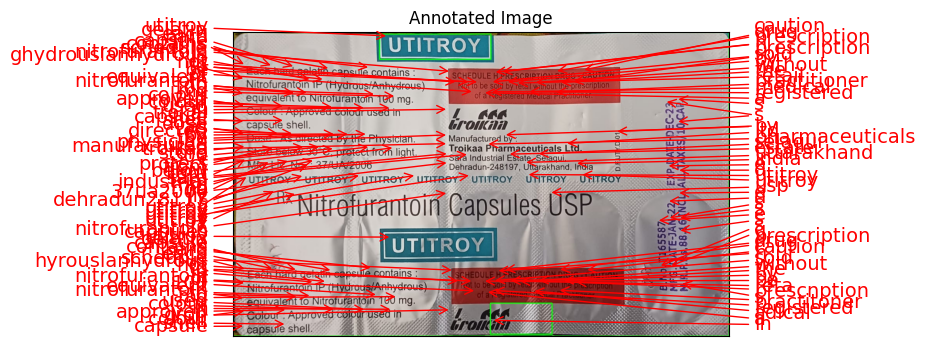

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()
read_image = keras_ocr.tools.read(image_path)
prediction_groups = pipeline.recognize([read_image])
keras_ocr.tools.drawAnnotations(image=read_image, predictions=prediction_groups[0])
plt.imshow(read_image)
plt.title("Annotated Image")
plt.show()

In [ ]:
raw_detections = [prediction[0] for prediction in prediction_groups[0]]
print(f'Detections: {raw_detections}')

Detections: ['utitroy', 'each', 'hard', 'gelatin', 'capsule', 'contains', 'caution', 'schedule', 'drug', 'h', 'prescription', 'nitrofurantoin', 'ip', 'ghydrouslanhydrous', 'prescription', 'not', 'to', 'be', 'sold', 'by', 'without', 'the', 'retail', 'of', 'registered', 'medical', 'practitioner', 'a', 'nitrofurantoin', 'equivalent', 'to', '100', 'mg', 's', '', 'colour', 'approved', 'colour', 'used', 'in', 'trokal', 'capsule', 'shell', 's', '', 'dose', 'as', 'directed', 'by', 'the', 'physician', 'manufactured', 'by', 'troikaa', 'pharmaceuticals', 'ltd', 'store', '300', 'c', 'below', 'from', 'protect', 'light', 'sara', 'industrial', 'estate', 'selaqui', 'mfg', 'no', '37ua2006', 'lic', 's', 'dehradun28117', 'uttarakhand', 'india', 'e', 'd', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'rx', 'e', 'nitrofurantoin', 'usp', 'capsules', 'd', 's', 's', 'e', 's', 'utitroy', 's', 'g', 'contains', 'capsule', 'hard', 'gelatin', 'each', 'schedule', 'prescription', 'drug

In [ ]:
def get_distance(predictions):
    x0, y0 = 0, 0
    detections = []
    for group in predictions:
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x, center_y = (top_left_x + bottom_right_x) / 2, (top_left_y + bottom_right_y) / 2
        distance_from_origin = math.dist([x0, y0], [center_x, center_y])
        distance_y = center_y - y0
        detections.append({
            'text': group[0],
            'center_x': center_x,
            'center_y': center_y,
            'distance_from_origin': distance_from_origin,
            'distance_y': distance_y,
            'top_left': group[1][0],
            'bottom_right': group[1][2]
        })
    return detections

predictions = prediction_groups[0]
predictions = get_distance(predictions)

In [ ]:
def distinguish_paragraphs(predictions, x_thresh=50, y_thresh=50):
    paragraphs = []
    current_paragraph = []
    last_box = None

    for pred in sorted(predictions, key=lambda x: (x['top_left'][1], x['top_left'][0])):
        if last_box is None:
            current_paragraph.append(pred)
            last_box = pred
        else:
            if (abs(pred['top_left'][0] - last_box['bottom_right'][0]) > x_thresh or
                abs(pred['top_left'][1] - last_box['bottom_right'][1]) > y_thresh):
                paragraphs.append(current_paragraph)
                current_paragraph = [pred]
            else:
                current_paragraph.append(pred)
            last_box = pred
    if current_paragraph:
        paragraphs.append(current_paragraph)
    return paragraphs

paragraphs = distinguish_paragraphs(predictions)

In [ ]:
ordered_preds = []
for paragraph in paragraphs:
    paragraph = sorted(paragraph, key=lambda x: (x['center_y'], x['center_x']))
    for each in paragraph:
        ordered_preds.append(each['text'])

print(f'Detections: \n{ordered_preds}')

Detections: 
['utitroy', 'each', 'gelatin', 'hard', 'contains', 'capsule', 'caution', 'schedule', 'drug', 'prescription', 'h', 'nitrofurantoin', 'ghydrouslanhydrous', 'ip', 'not', 'to', 'be', 'sold', 'by', 'prescription', 'without', 'the', 'retail', 'medical', 'registered', 'of', 'practitioner', 'nitrofurantoin', 'a', 'to', 'equivalent', '100', 'mg', 's', '', 'approved', 'colour', 'colour', 'used', 'in', 'trokal', 'shell', 'capsule', 's', '', 'dose', 'as', 'directed', 'by', 'the', 'physician', 'manufactured', 'by', 'troikaa', 'ltd', 'pharmaceuticals', 'store', '300', 'c', 'from', 'below', 'light', 'protect', 'sara', 'selaqui', 'estate', 'industrial', 'mfg', 'no', '37ua2006', 'lic', 'uttarakhand', 'dehradun28117', 's', 'india', 'e', 'd', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'rx', 'usp', 'capsules', 'e', 'nitrofurantoin', 'd', 's', 's', 'e', 's', 'utitroy', 'g', 's', 'contains', 'hard', 'each', 'prescription', 'drug', 'caution', 'schedule', 'gelati

In [ ]:
# Join detections into sentences by clusters
final_output = '\n\n'.join([' '.join([word['text'] for word in sorted(paragraph, key=lambda x: (x['center_y'], x['center_x']))]) for paragraph in paragraphs])
print(final_output)

utitroy

each gelatin hard

contains

capsule

caution

schedule

drug

prescription

h

nitrofurantoin ghydrouslanhydrous

ip

not to be sold by

prescription

without the

retail medical

registered

of

practitioner

nitrofurantoin

a

to

equivalent

100 mg

s



approved colour colour used in

trokal

shell

capsule

s



dose as directed by the physician

manufactured by

troikaa

ltd

pharmaceuticals

store

300 c

from

below

light

protect

sara

selaqui

estate

industrial

mfg

no 37ua2006

lic

uttarakhand

dehradun28117

s

india

e d

utitroy utitroy

utitroy utitroy utitroy

utitroy

utitroy rx

usp

capsules

e

nitrofurantoin

d s

s

e

s

utitroy

g

s

contains

hard

each

prescription drug caution

schedule

gelatin capsule

h sold by without the

not to be

reta

hyrouslanhydrous

ip

prescnption

s

nitrofurantoin

practitoner

registered

of

adical

a

100

nitrofurantoin

to

mg

equivalent

colour

in

used

approved

gron

colour

in

shell

capsule


In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,463 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
import pytesseract
from PIL import Image

image_path = 'imguse.jpg'
extracted_text = pytesseract.image_to_string(Image.open(image_path))
print(extracted_text)

         
 

  

| UTITROY |

Each hard gelatin capsule contains :
Nitrofurantoin IP (Hydrous/Anhydrous)
equivalent to Nitrofurantoin 100 mg.

 
  
    
    
  
  
  

 

* Nitrofyrantoin Capsules USP.

a
Colour : Approved colour used in Ll hha 5
capsule shell. Gromila we
Dose : As directed by the Physician. Manufactured by : + 5 an
Store below 30°C, protect from light. Troikaa Pharmaceuticals Ltd. e Ex
2 Sara Industrial Estate, Selaqui, a ot

2 : Ee ehradun- , Uttarakhand, India a :
Mfg. Lic. No. : 37/UA/2006 Dehradun-248197, Uttarakhand, Indi as
UTITROY UTITROY  UTITROY © UTITROY  UTITROY UTITROY, UTITROY na
o
S
wo
_

4rE-JAN-22

M.R.P.RS,88,

>

5 ]

Each hard gelatin cps rcontains :
Nitrofurantoin IP (Hyc \sfariyérous)
: gequivalent to Nite 100 mg.
Colour : Approved Col i

% éapsule shell.

    
   

 

 
   
 
    



 
    

Each hard gelatin capsule contains :
Nitrofurantoin IP (Hydrous/Anhydrous) fe
equivalent to Nitrofurantoin 100 mg.
Colour : Approved colour used in a
capsule shell. GIf'On,



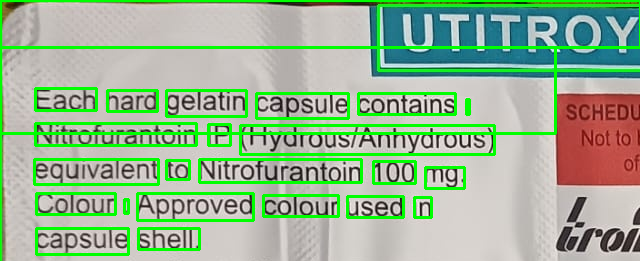

-1

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow # Import the Colab-compatible display function

image_path = 'imguse.jpg'
image = cv2.imread(image_path)

# crop the image
height, width, _ = image.shape
cropped_image = image[:height//3, :width//2, :]

# extract and print text
extracted_text = pytesseract.image_to_string(cropped_image)
print(extracted_text)

# get the data for bounding boxes
d = pytesseract.image_to_data(cropped_image, output_type=pytesseract.Output.DICT)

# draw the boxes on the image
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cropped_image = cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(cropped_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)

 
 
 

Each hard gelatin capsule contains :

Nitrofurantoin IP (Hydrous/Anhydrous) eae
equivalent to Nitrofurantoin 100 mg.

Colour : Approved colour used in Ll hha

capsule shell. Gf OMmila

Dose : As directed by the Physician. Manufactured by : i 8
Store below 30°C, protect from light. Wolkga Phew maceuicals tid E
Mfg. Lic. No. : 37/UA/2006 Dehradun-248197, Uttarakhand, India
UTITROY UTITROY  UTITROY © UTITROY  UTITROY UTITROY, UTITROY

* Nitrofurantoin Capsules USP
: ;

Each hard gelatin Ll ‘contains :
Nitrofurantoin IP (H Prouplantydrous)
“equivalent to Nitrofu HA 100 mg.
Colour : Approved c used in
” eapsule shell.

 
 
 
 
 

~£XP. DATE-DEC-23
CL, ALL TAXES/10 CAP.

    
   
 
  
    

MFG. DATEJAN
M.R_PRS.88,16 IN

    
   
 
 
 
   
 
   
  

|-22

 



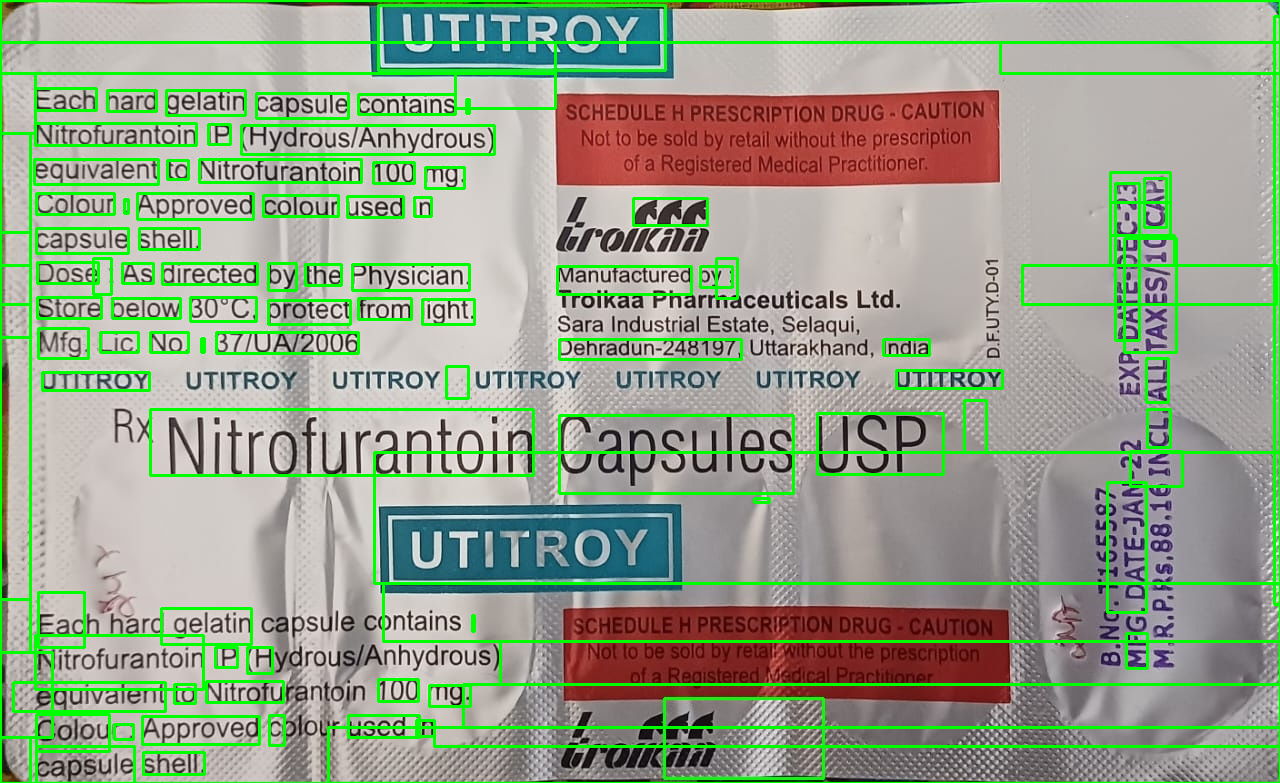

-1

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

# Set the path to the image
image_path = 'imguse.jpg'

# Read the image
image = cv2.imread(image_path)

# Extract and print text from the entire image
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

# Get the data for bounding boxes
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Draw the boxes on the image
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)


In [ ]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
def main(argv):

 default_file = "../../../../data/sudoku.png"
 filename = argv[0] if len(argv) > 0 else default_file
 # Loads an image
 src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
 # Check if image is loaded fine
 if src is None:
 print ('Error opening image!')
 print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
 return -1


 dst = cv.Canny(src, 50, 200, None, 3)

 # Copy edges to the images that will display the results in BGR
 cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
 cdstP = np.copy(cdst)

 lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

 if lines is not None:
 for i in range(0, len(lines)):
 rho = lines[i][0][0]
 theta = lines[i][0][1]
 a = math.cos(theta)
 b = math.sin(theta)
 x0 = a * rho
 y0 = b * rho
 pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
 pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
 cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


 linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

 if linesP is not None:
 for i in range(0, len(linesP)):
 l = linesP[i][0]
 cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

 cv.imshow("Source", src)
 cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
 cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

 cv.waitKey()
 return 0

if __name__ == "__main__":
 main(sys.argv[1:])

In [ ]:
!pip install cnstd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 35.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_c

In [ ]:
!pip install cnstd[ort-cpu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install cnstd[ort-cpu]

# New

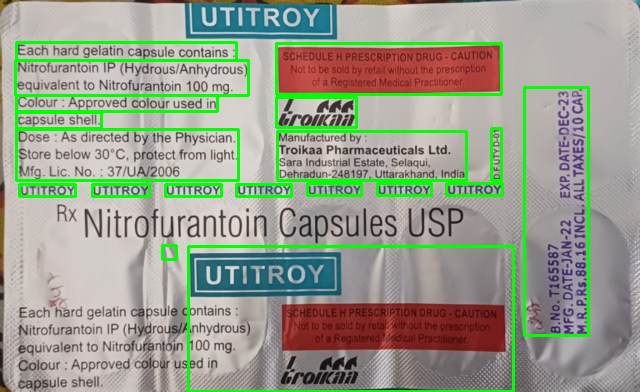

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

large = cv2.imread('imguse.jpg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.ones((5, 5), np.uint8)
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)


cv2_imshow(rgb)
cv2.waitKey(0)

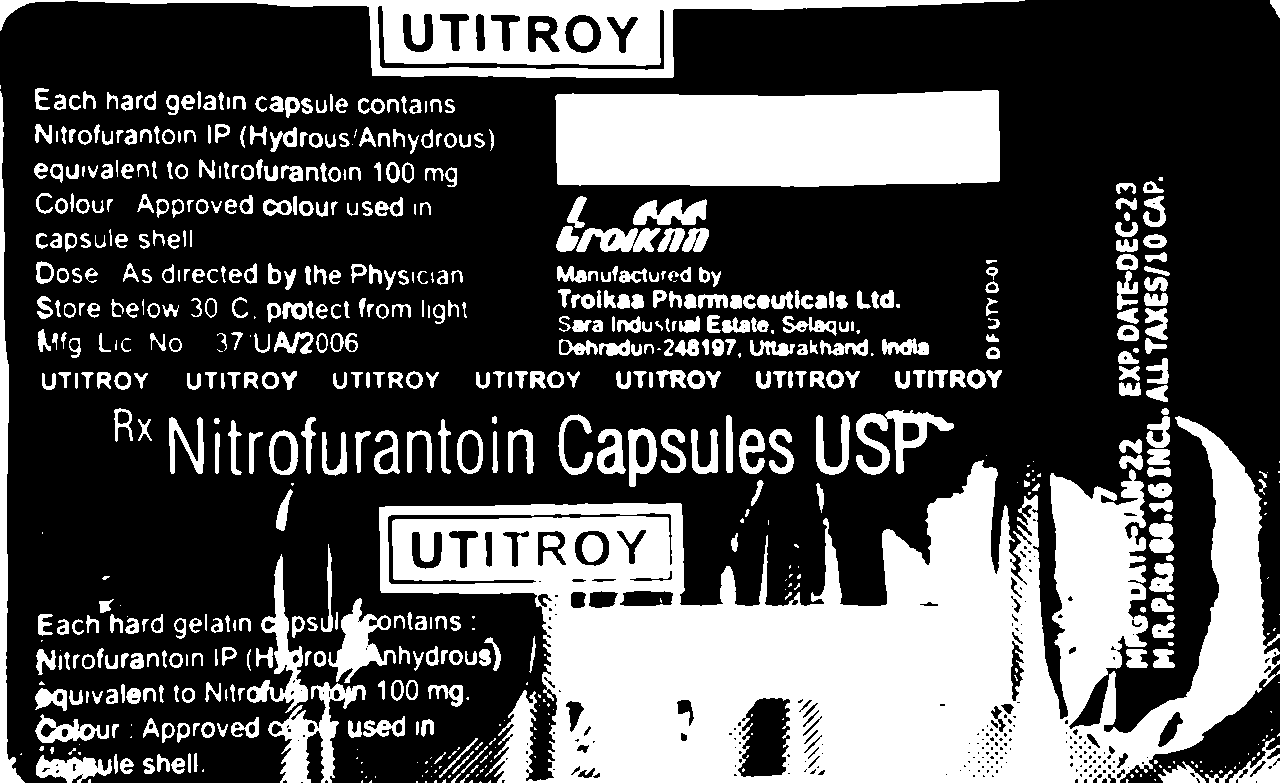

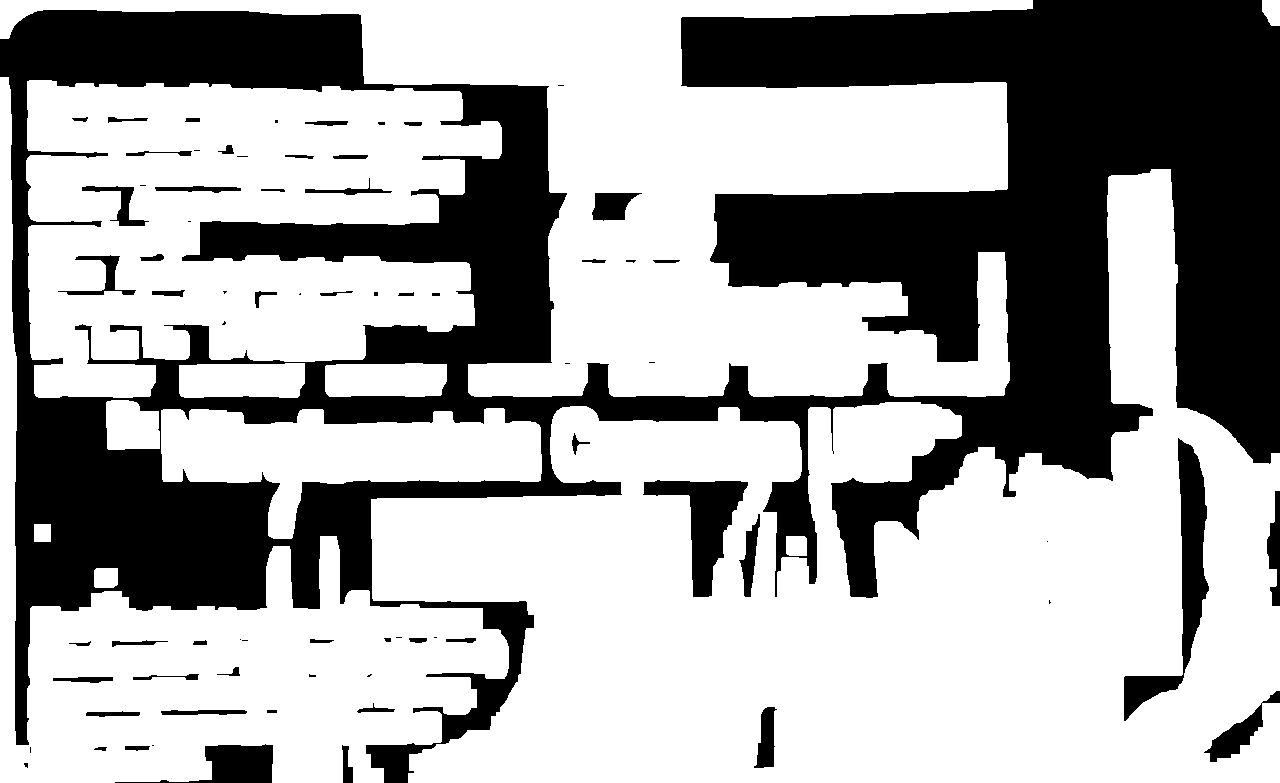

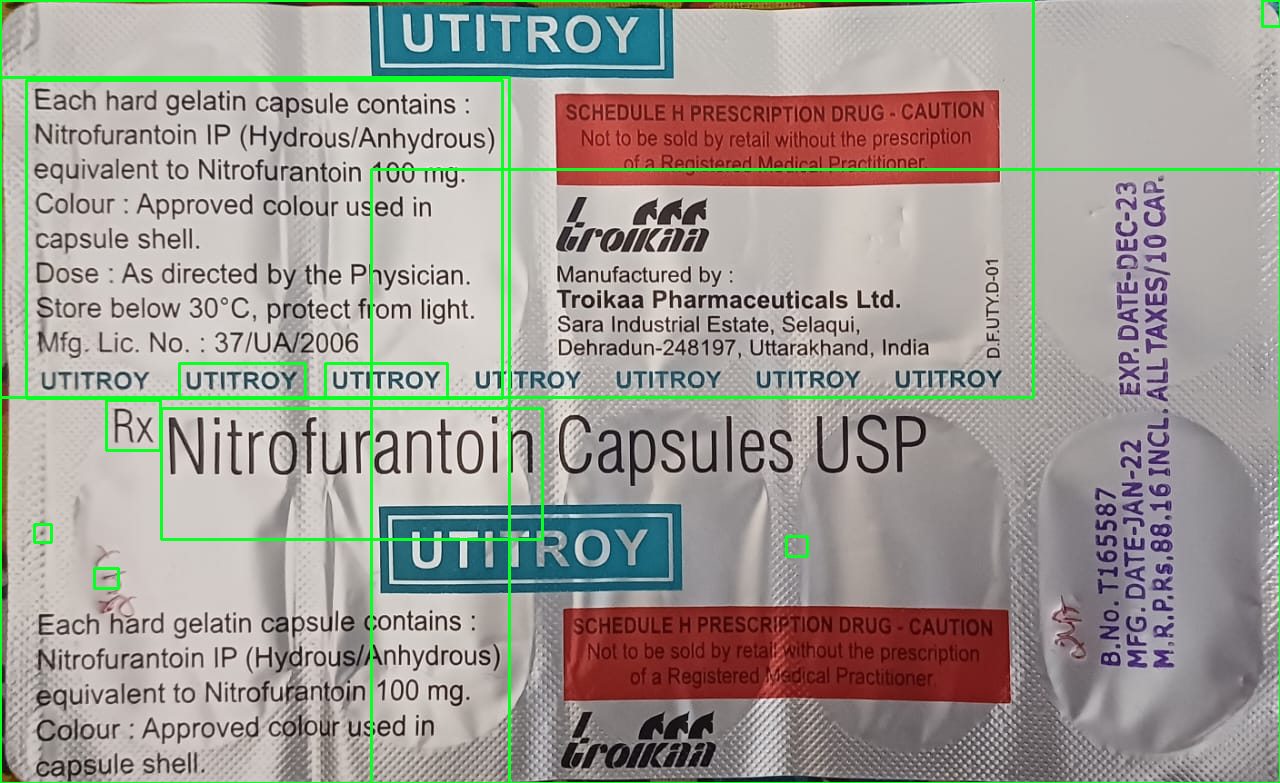

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('imguse.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours and draw rectangle
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

cv2_imshow(thresh) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(dilate) # Use cv2_imshow instead of cv2.imshow
cv2_imshow(image)
cv2.waitKey()